# Face Recognition - Data Preparation and PCA
This notebook covers loading the ORL face dataset, preparing the data matrix and label vector, and performing PCA using scikit-learn.

In [1]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Constants
IMAGE_WIDTH = 92
IMAGE_HEIGHT = 112
DATASET_PATH = './data/'  # Change this to your actual dataset path

def load_images_and_labels(dataset_path):
    data = []
    labels = []
    for subject_id in range(1, 41):
        subject_path = os.path.join(dataset_path, f's{subject_id}')
        for img_name in os.listdir(subject_path):
            img_path = os.path.join(subject_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_flat = img.flatten()
            data.append(img_flat)
            labels.append(subject_id)
    return np.array(data), np.array(labels)

# Load images and labels
X, y = load_images_and_labels(DATASET_PATH)
print(f'Data shape: {X.shape}, Labels shape: {y.shape}')

Data shape: (400, 10304), Labels shape: (400,)


In [2]:
# Split into training and testing
X_train = X[::2]
y_train = y[::2]
X_test = X[1::2]
y_test = y[1::2]

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (200, 10304), Test shape: (200, 10304)


Alpha: 0.8, Components retained: 36
Reconstructed shape: (5, 10304)


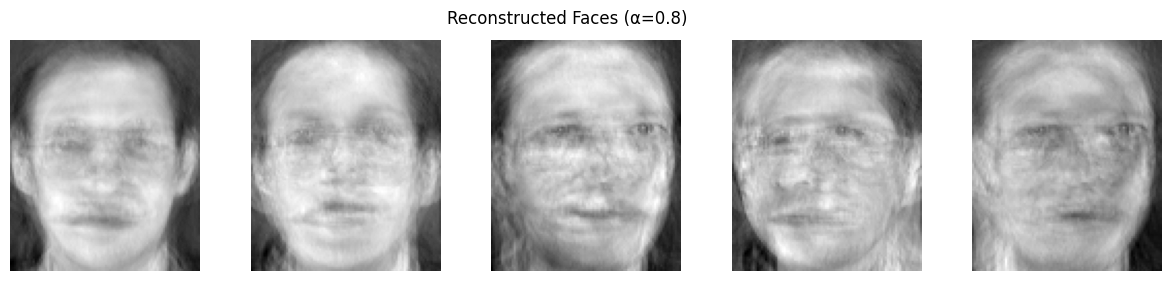

Alpha: 0.85, Components retained: 51
Reconstructed shape: (5, 10304)


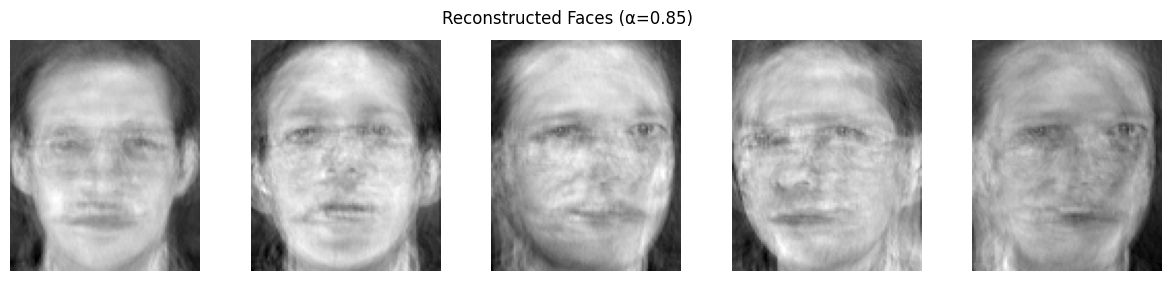

Alpha: 0.9, Components retained: 76
Reconstructed shape: (5, 10304)


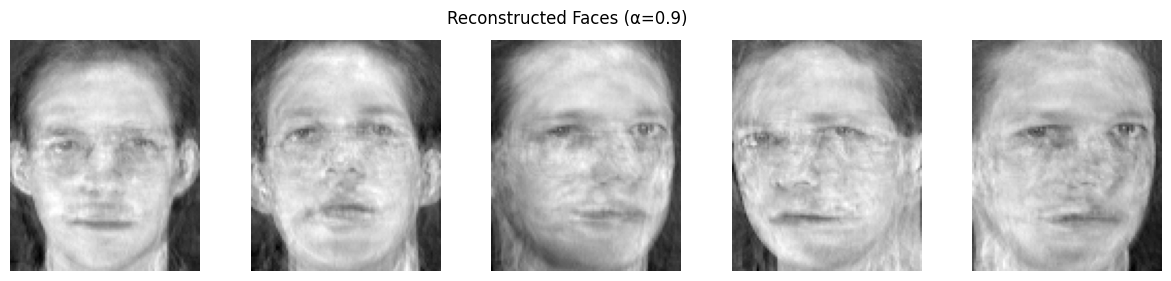

Alpha: 0.95, Components retained: 115
Reconstructed shape: (5, 10304)


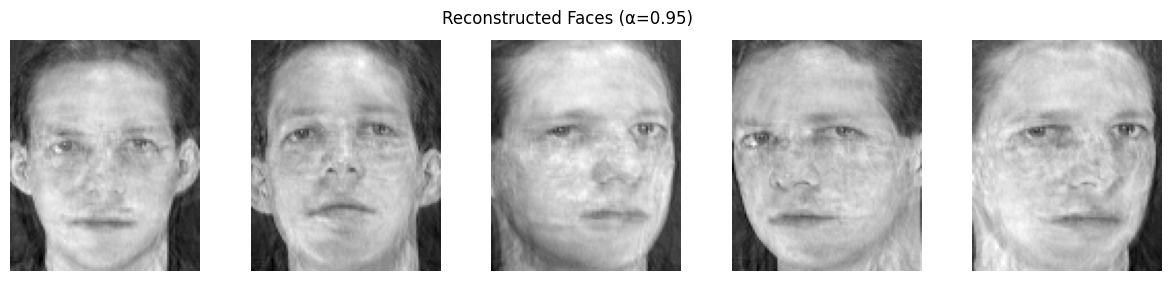

In [4]:
# PCA with variance retention
alphas = [0.8, 0.85, 0.9, 0.95]
pca_results = {}

for alpha in alphas:
    pca = PCA(n_components=alpha, svd_solver='full')
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    print(f'Alpha: {alpha}, Components retained: {pca.n_components_}')
    pca_results[alpha] = {
        'pca': pca,
        'X_train_pca': X_train_pca,
        'X_test_pca': X_test_pca,
    }

    # Visualize a few reconstructed faces
    reconstructed = pca.inverse_transform(X_train_pca[:5])
    print(f'Reconstructed shape: {reconstructed.shape}')
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axs[i].imshow(reconstructed[i].reshape((112, 92)), cmap='gray')
        axs[i].axis('off')
    plt.suptitle(f'Reconstructed Faces (α={alpha})')
    plt.show()

In [5]:
# Save arrays for reuse in clustering step
np.save('./npy/X_train.npy', X_train)
np.save('./npy/X_test.npy', X_test)
np.save('./npy/y_train.npy', y_train)
np.save('./npy/y_test.npy', y_test)
for alpha in alphas:
    np.save(f'./npy/pca_alpha_{alpha}_train.npy', pca_results[alpha]['X_train_pca'])
    np.save(f'./npy/pca_alpha_{alpha}_test.npy', pca_results[alpha]['X_test_pca'])

## PCA

Steps in PCA 
- Center the data: X = X - μ 
- Compute covariance matrix 
- Extract eigenvectors and eigenvalues 
- Project to new basis: Z = XW
- Reconstruct data: X = ZW^T + μ

In [13]:
from pca import PCA_GHALBAN
# from sklearn.metrics import pairwise_distances

pca = PCA_GHALBAN(alpha=0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train) 

print(f'PCA with GHALBAN, Components retained: {pca.components}')

PCA with GHALBAN, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ...  0.00448495  0.0003145
   0.00661334]
 [ 0.00394554 -0.01424565 -0.01981946 ...  0.00516856  0.00077837
   0.00594902]
 [ 0.00384451 -0.01449853 -0.01962105 ...  0.00130254 -0.00042048
   0.00427985]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.02063381  0.00199236
  -0.00838872]
 [ 0.00501108  0.01055497 -0.01355881 ...  0.00124745 -0.00175064
  -0.01063136]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.01181052  0.00180847
  -0.00782502]]


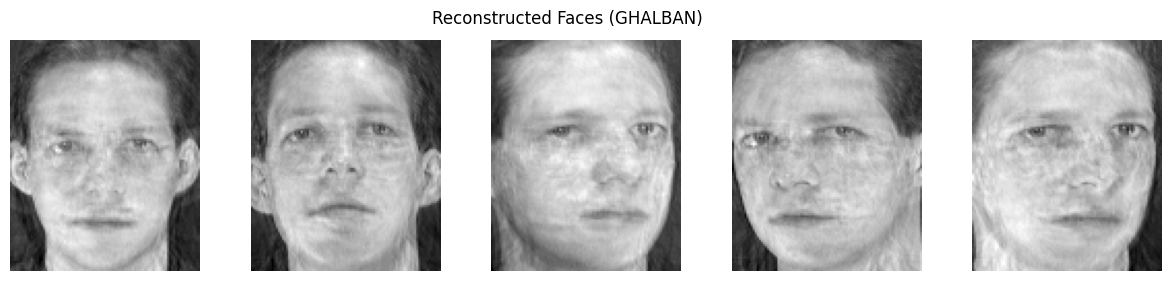

In [14]:
# Visualize a few reconstructed faces
reconstructed = pca.inverse_transform(X_train_pca[:5])

# Visualize a few reconstructed faces
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(reconstructed[i].reshape((112, 92)), cmap='gray')
    axs[i].axis('off')
plt.suptitle('Reconstructed Faces (GHALBAN)')
plt.show()

Alpha: 0.8, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ... -0.00778101  0.00343862
  -0.00406728]
 [ 0.00394554 -0.01424565 -0.01981946 ... -0.00798029 -0.00069583
  -0.00425275]
 [ 0.00384451 -0.01449853 -0.01962105 ... -0.00854379  0.00081495
  -0.00546642]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.01112122 -0.01993913
   0.0004344 ]
 [ 0.00501108  0.01055497 -0.01355881 ...  0.00371662 -0.0177102
   0.00066408]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.00546495 -0.01006843
   0.00301118]]
(200, 36)
Reconstructed shape: (5, 10304)


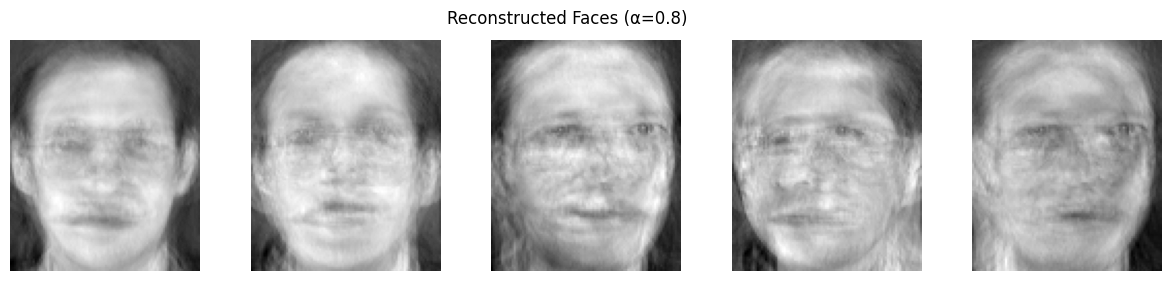

Alpha: 0.85, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ... -0.0054864   0.00135869
  -0.00270256]
 [ 0.00394554 -0.01424565 -0.01981946 ... -0.00652762  0.00043369
  -0.00484479]
 [ 0.00384451 -0.01449853 -0.01962105 ... -0.00497704 -0.00027871
  -0.00476218]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.00444086 -0.02075634
  -0.0094093 ]
 [ 0.00501108  0.01055497 -0.01355881 ...  0.00236007 -0.02135241
  -0.00487805]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.00406895 -0.0217231
   0.00136198]]
(200, 51)
Reconstructed shape: (5, 10304)


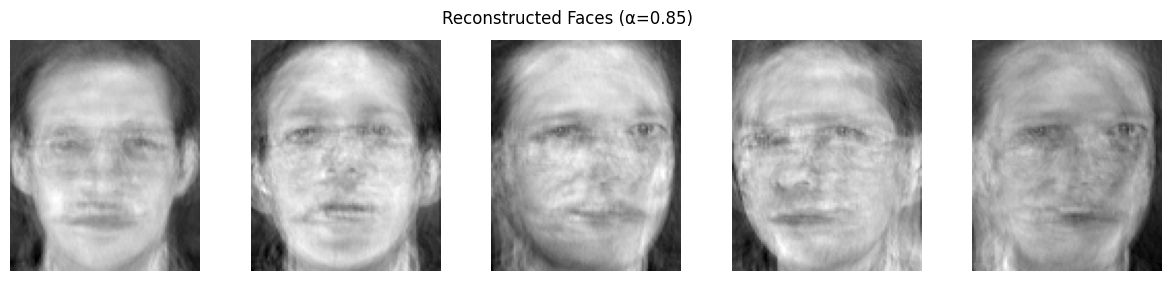

Alpha: 0.9, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ...  0.00386064  0.007156
   0.00361649]
 [ 0.00394554 -0.01424565 -0.01981946 ...  0.002691    0.00827635
   0.00315171]
 [ 0.00384451 -0.01449853 -0.01962105 ...  0.00046914  0.00767868
   0.00258637]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.01555597 -0.00363809
  -0.01597427]
 [ 0.00501108  0.01055497 -0.01355881 ... -0.00282898 -0.00809339
  -0.0226711 ]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.00231385 -0.0121849
  -0.03189291]]
(200, 76)
Reconstructed shape: (5, 10304)


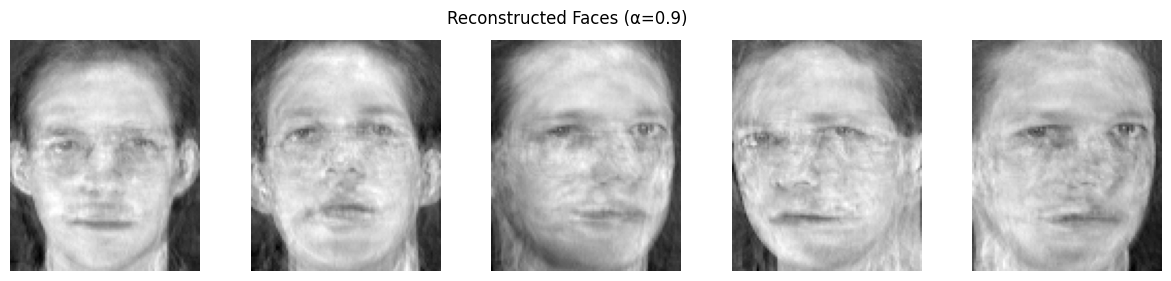

Alpha: 0.95, Components retained: [[ 0.0040031  -0.01426885 -0.01979681 ...  0.00448495  0.0003145
   0.00661334]
 [ 0.00394554 -0.01424565 -0.01981946 ...  0.00516856  0.00077837
   0.00594902]
 [ 0.00384451 -0.01449853 -0.01962105 ...  0.00130254 -0.00042048
   0.00427985]
 ...
 [ 0.00600102  0.01186356 -0.01348226 ...  0.02063381  0.00199236
  -0.00838872]
 [ 0.00501108  0.01055497 -0.01355881 ...  0.00124745 -0.00175064
  -0.01063136]
 [ 0.00639668  0.01012432 -0.01428762 ... -0.01181052  0.00180847
  -0.00782502]]
(200, 115)
Reconstructed shape: (5, 10304)


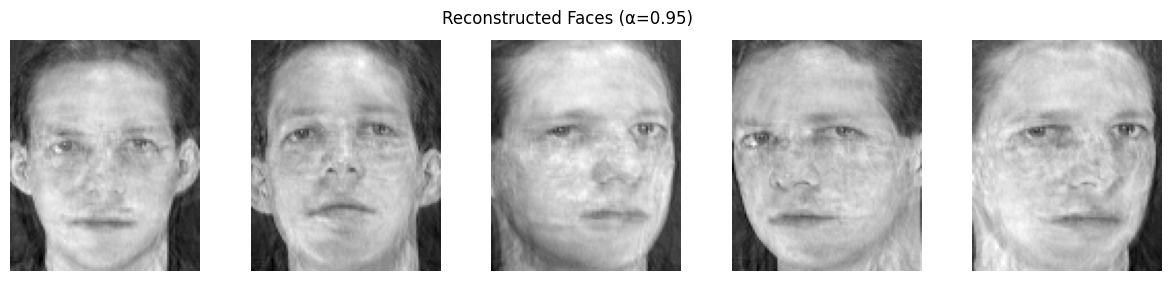

In [ ]:
# PCA with variance retention
alphas = [0.8, 0.85, 0.9, 0.95]
pca_results = {}
X_train_pca = {}
X_test_pca = {}

for alpha in alphas:
    pca = PCA_GHALBAN(alpha=alpha)
    # we fit first using the training set
    pca.fit(X_train)

    # then we transform the training and test sets
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f'Alpha: {alpha}, Components retained: {pca.components}')
    pca_results[alpha] = {
        'pca': pca,
        'X_train_pca': X_train_pca,
        'X_test_pca': X_test_pca,
    }

    # Visualize a few reconstructed faces
    reconstructed = pca.inverse_transform(X_train_pca[:5])
    print(f'Reconstructed shape: {reconstructed.shape}')
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axs[i].imshow(reconstructed[i].reshape((112, 92)), cmap='gray')
        axs[i].axis('off')
    plt.suptitle(f'Reconstructed Faces (α={alpha})')
    plt.show()
# Save arrays for reuse in clustering step
np.save('./npy/X_train.npy', X_train)
np.save('./npy/X_test.npy', X_test)
np.save('./npy/y_train.npy', y_train)
np.save('./npy/y_test.npy', y_test)
for alpha in alphas:
    np.save(f'./npy/pca_alpha_{alpha}_train.npy', pca_results[alpha]['X_train_pca'])
    np.save(f'./npy/pca_alpha_{alpha}_test.npy', pca_results[alpha]['X_test_pca'])  

## BONUS: Autoencoder
### Training

In [13]:
from autoencoder import AutoEncoder
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Hyperparameters
# Parameters
input_dim = X_train.shape[1]  # 10304
hidden_dim = 64
bottleneck_dim = 32              
batch_size = 16
learning_rate = 1e-4
num_epochs = 30

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # ensure float32
train_dataset = TensorDataset(X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, shuffle=True)
# test_loader = torch.utils.data.DataLoader(X_test, batch_size=batch_size, shuffle=False)

model = AutoEncoder(input_dim, hidden_dim, bottleneck_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training 
for epoch in range(num_epochs):
    model.train() # setting the model to training mode
    run_loss = 0.0
    for batch in train_loader:
        # Zero the gradients
        data = batch[0] # Ensure data is float
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        
        # Compute loss
        loss = criterion(outputs, data)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        run_loss += loss.item()
    
    epoch_loss = run_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
# Save the model
torch.save(model.state_dict(), 'autoencoder.pth')
# Load the model
model.load_state_dict(torch.load('autoencoder.pth'))
model.eval()
# Test the model    


Epoch [1/30], Loss: 15084.8493
Epoch [2/30], Loss: 15026.8668
Epoch [3/30], Loss: 15040.7872
Epoch [4/30], Loss: 15050.7048
Epoch [5/30], Loss: 15028.8235
Epoch [6/30], Loss: 15058.3634
Epoch [7/30], Loss: 15052.3796
Epoch [8/30], Loss: 15092.2438
Epoch [9/30], Loss: 15017.9933
Epoch [10/30], Loss: 15065.4333
Epoch [11/30], Loss: 15096.1328
Epoch [12/30], Loss: 15026.0630
Epoch [13/30], Loss: 15098.5013
Epoch [14/30], Loss: 15077.8090
Epoch [15/30], Loss: 15052.3927
Epoch [16/30], Loss: 14981.8878
Epoch [17/30], Loss: 15071.7825
Epoch [18/30], Loss: 14982.6205
Epoch [19/30], Loss: 15102.6669
Epoch [20/30], Loss: 15031.7148
Epoch [21/30], Loss: 15028.3851
Epoch [22/30], Loss: 15056.3951
Epoch [23/30], Loss: 14990.0829
Epoch [24/30], Loss: 15055.6089
Epoch [25/30], Loss: 15017.4521
Epoch [26/30], Loss: 15034.2161
Epoch [27/30], Loss: 14993.6193
Epoch [28/30], Loss: 14986.1539
Epoch [29/30], Loss: 14983.1016
Epoch [30/30], Loss: 14973.2692


/tmp/ipykernel_73546/277358877.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('autoencoder.pth'))


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=10304, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10304, bias=True)
    (3): Sigmoid()
  )
)

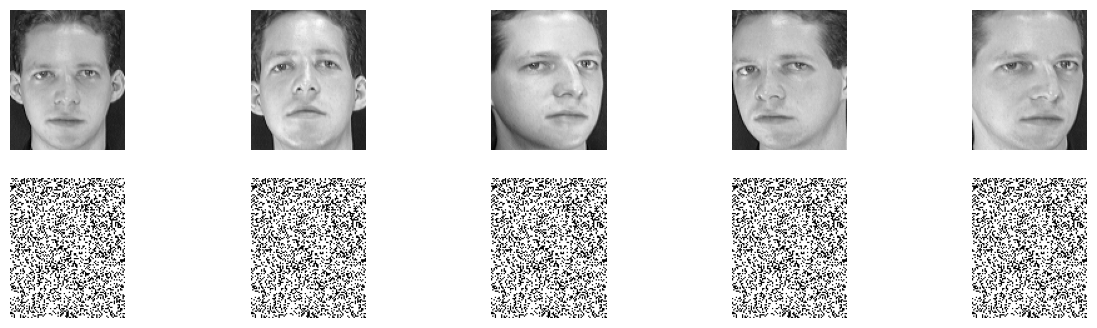

In [14]:
import matplotlib.pyplot as plt

model.eval()  # Set model to evaluation mode
sample = torch.tensor(X_train[:5], dtype=torch.float32)  # Take 5 examples
reconstructed = model(sample).detach().numpy()

fig, axs = plt.subplots(2, 5, figsize=(15, 4))
for i in range(5):
    axs[0, i].imshow(sample[i].reshape(112, 92), cmap='gray')        # original
    axs[0, i].axis('off')
    axs[1, i].imshow(reconstructed[i].reshape(112, 92), cmap='gray') # reconstructed
    axs[1, i].axis('off')
plt.show()


In [17]:
import itertools

# Tuning hyperparams

def train_autoencoder(X_train, input_dim, hidden_dim, bottleneck_dim, batch_size, lr, num_epochs):
    model = AutoEncoder(input_dim, hidden_dim, bottleneck_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
    
    model.train()
    for epoch in range(num_epochs):
        run_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            run_loss += loss.item()
    avg_loss = run_loss / len(train_loader)
    return avg_loss

hidden_dims = [256, 512]
bottleneck_dims = [32, 64]
learning_rates = [1e-3, 1e-4]
batch_sizes = [16, 32, 64]
epochs = [10, 30, 50, 60, 70]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)

input_dim = X_train_tensor.shape[1]

best_loss = float('inf')
best_config = None
# Grid search
for hidden_dim, bottleneck_dim, lr, batch_size, num_epochs in itertools.product(hidden_dims, bottleneck_dims, learning_rates, batch_sizes, epochs):
    print(f"Training with hidden_dim={hidden_dim}, bottleneck_dim={bottleneck_dim}, lr={lr}, batch_size={batch_size}, epochs={num_epochs}")
    avg_loss = train_autoencoder(
        X_train_tensor,
        input_dim,
        hidden_dim,
        bottleneck_dim,
        batch_size,
        lr,
        num_epochs
    )
    print(f"Average loss: {avg_loss:.6f}")
    
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_config = {
            'hidden_dim': hidden_dim,
            'bottleneck_dim': bottleneck_dim,
            'learning_rate': lr,
            'batch_size': batch_size,
            'epochs': num_epochs
        }

print("\nBest Configuration Found:")
print(best_config)
print(f"Best Loss: {best_loss:.6f}")

Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=16, epochs=10
Average loss: 14970.038462
Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=16, epochs=30
Average loss: 15007.032527
Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=16, epochs=50
Average loss: 14965.442758
Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=16, epochs=60
Average loss: 15046.521860
Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=16, epochs=70
Average loss: 14934.805138
Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=32, epochs=10
Average loss: 15070.827706
Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=32, epochs=30
Average loss: 14931.249721
Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=32, epochs=50
Average loss: 14907.902204
Training with hidden_dim=256, bottleneck_dim=32, lr=0.001, batch_size=32, epochs=60
Average loss: 14995.130022
T

KeyboardInterrupt: 